# Regression - Real Estate in Rishon Lezion

In [ ]:
# Image

Importing the neccesary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

The csv file that we created from web scraping

In [2]:
df = pd.read_csv('C:/Users/matan/OneDrive/שולחן העבודה/Data Science Project/Rishon_Lezion_Real_Estate.csv')

In [3]:
df.head()

,index,Year sold,Month sold,Day sold,Street,Street number,Kind,Number of rooms,Floor,Squared meter,Price
0,0,2021,12,20,נירים,3,דירה בבית קומות,6.0,6.0,134.60,3670000
1,1,2021,12,19,קרל נטר,6,דירה בבית קומות,3.0,3.0,81.00,1770000
2,2,2021,12,16,יהודה הלוי,27,דירה בבית קומות,5.0,5.0,120.00,2400000
3,3,2021,12,15,שרירא שמואל,17,דירה בבית קומות,4.0,2.0,64.32,2050000
4,4,2021,12,15,"תרמ""ב",30,דירה בבית קומות,3.0,3.0,80.98,1640000


In [4]:
df

,index,Year sold,Month sold,Day sold,Street,Street number,Kind,Number of rooms,Floor,Squared meter,Price
0,0,2021,12,20,נירים,3,דירה בבית קומות,6.0,6.0,134.60,3670000
1,1,2021,12,19,קרל נטר,6,דירה בבית קומות,3.0,3.0,81.00,1770000
2,2,2021,12,16,יהודה הלוי,27,דירה בבית קומות,5.0,5.0,120.00,2400000
3,3,2021,12,15,שרירא שמואל,17,דירה בבית קומות,4.0,2.0,64.32,2050000
4,4,2021,12,15,"תרמ""ב",30,דירה בבית קומות,3.0,3.0,80.98,1640000
...,...,...,...,...,...,...,...,...,...,...,...
19438,19438,2010,5,30,ההתיישבות,51,דירה בבית קומות,4.0,2.0,112.10,1345000
19439,19439,2010,5,30,מזרחי משה,5,דירה בבית קומות,4.0,3.0,90.00,900000
19440,19440,2010,5,30,"שז""ר זלמן",28,דירה,4.0,2.0,126.00,1725000
19441,19441,2010,5,30,"תרמ""ב",13,דירה בבית קומות,3.0,20.0,78.40,1350000


Replace text to integers in column 'Kind' by levels

In [5]:
df["Kind"].replace({"דירה": "1", "דירה בבית קומות": "1"}, inplace=True)
df["Kind"].replace({"דירת גן": "2"}, inplace=True)
df["Kind"].replace({"דירת גג": "3", "דירת גג (פנטהאוז)": "3"}, inplace=True)

Removing the unnecesary columns

In [6]:
df.pop('index')
#df.pop('Day sold')
#df.pop('Street number')

0            0
1            1
2            2
3            3
4            4
         ...  
19438    19438
19439    19439
19440    19440
19441    19441
19442    19442
Name: index, Length: 19443, dtype: int64

In [7]:
df.head()

,Year sold,Month sold,Day sold,Street,Street number,Kind,Number of rooms,Floor,Squared meter,Price
0,2021,12,20,נירים,3,1,6.0,6.0,134.60,3670000
1,2021,12,19,קרל נטר,6,1,3.0,3.0,81.00,1770000
2,2021,12,16,יהודה הלוי,27,1,5.0,5.0,120.00,2400000
3,2021,12,15,שרירא שמואל,17,1,4.0,2.0,64.32,2050000
4,2021,12,15,"תרמ""ב",30,1,3.0,3.0,80.98,1640000


Description for the columns stats

In [11]:
df.describe()

,Year sold,Month sold,Number of rooms,Floor,Squared meter,Price
count,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,1.944300e+04
mean,2015.785064,6.581340,3.742637,3.914519,86.776765,1.581540e+06
std,3.333801,3.488176,0.858536,3.365243,32.624374,1.305453e+06
min,2010.000000,1.000000,1.000000,0.000000,21.500000,8.200000e+04
25%,2013.000000,3.000000,3.000000,2.000000,66.730000,1.219142e+06
50%,2016.000000,7.000000,4.000000,3.000000,83.590000,1.490000e+06
75%,2019.000000,10.000000,4.000000,5.000000,102.000000,1.800000e+06
max,2021.000000,12.000000,9.000000,26.000000,1950.000000,1.060000e+08


Correlation matrix.

From here we can see which columns are more correlated to the 'Price' column,
and which columns aren't.

In [ ]:
plt.figure(figsize=(16, 8))
sb.heatmap(df.corr(), cmap = 'Blues', annot=True);

Ploting the columns

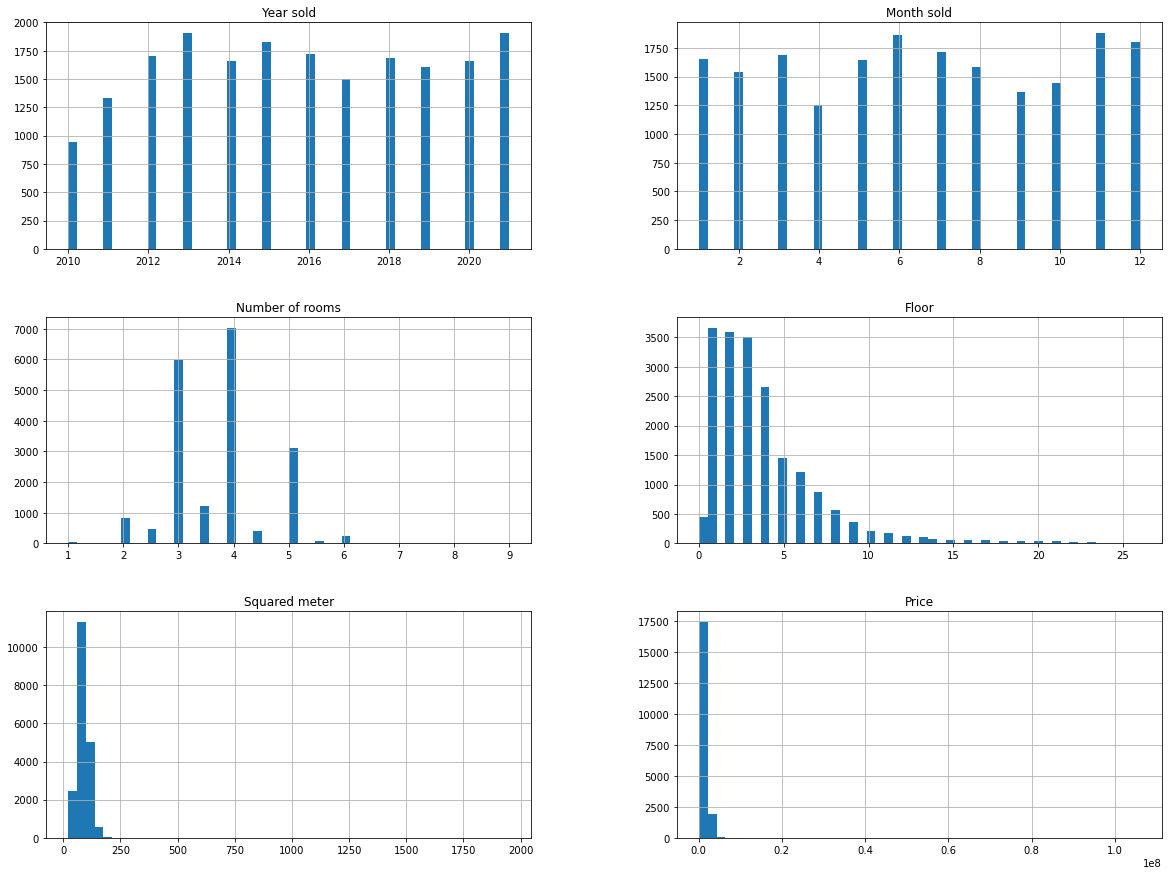

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Cleaning outliers

In [13]:
df = df.loc[df['Floor'] < 10]
df = df.loc[(df['Number of rooms'] > 1) & (df['Number of rooms'] < 7)]
df = df.loc[df['Squared meter'] < 250]
df = df.loc[df['Price'] < 10000000]

Ploting again to check if there are more specific outliers

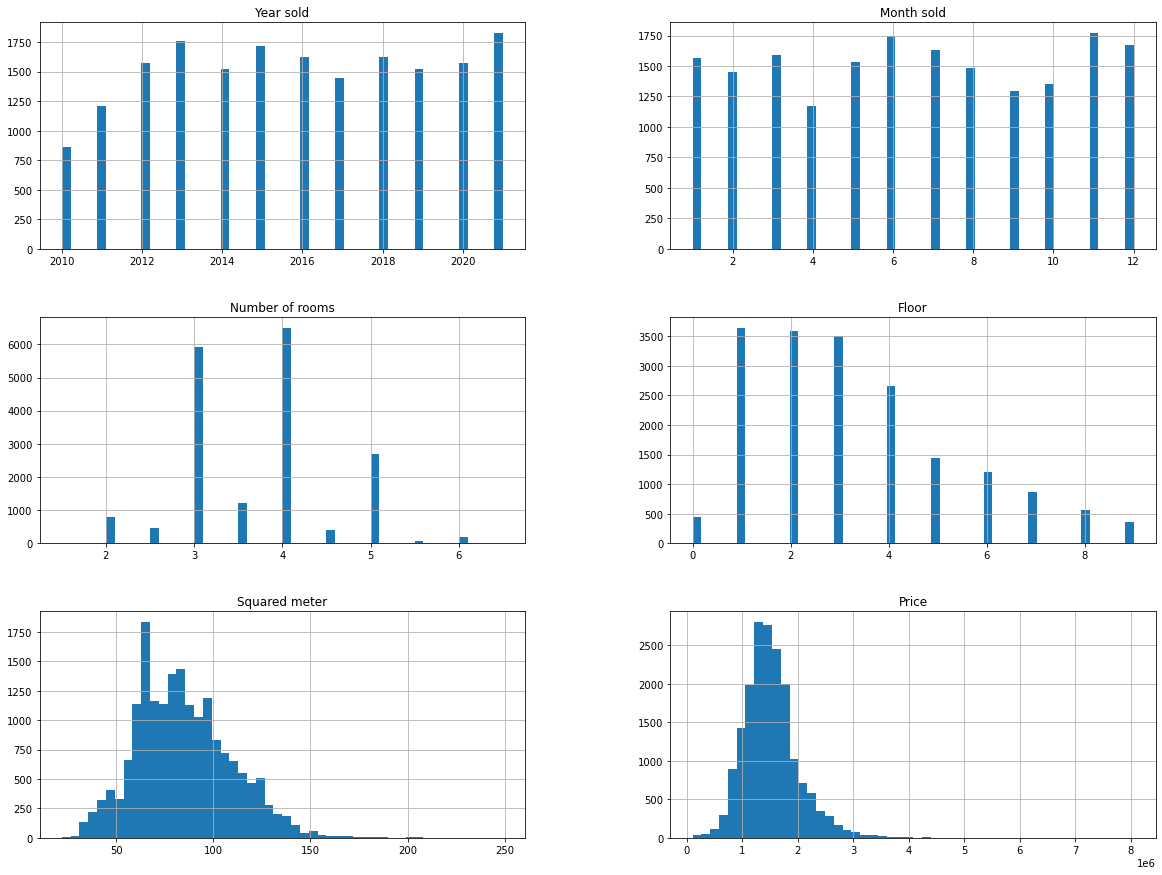

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Cleaning outliers again (more specific)

In [15]:
df = df.loc[df['Squared meter'] <= 150]
df = df.loc[df['Price'] < 3000000]

An updated heat map

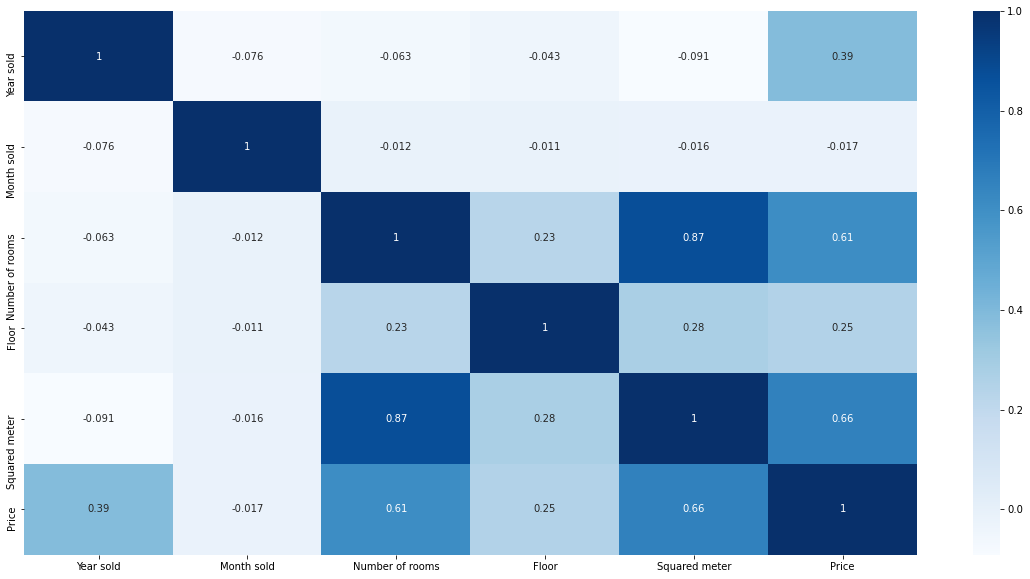

In [16]:
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(), cmap = 'Blues', annot=True);

As we can see from the correlation map,
the Month sold and Price columns are almost not correlated at all.

Therfore, we will drop the 'Month sold' column (Maybe some other columns too)

In [19]:
df = df.drop('Month sold', axis=1)
# maybe some more columns

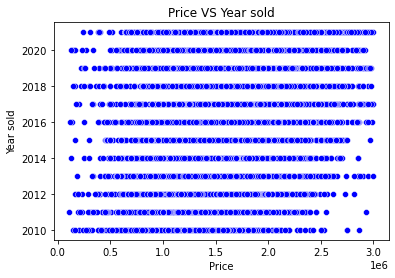

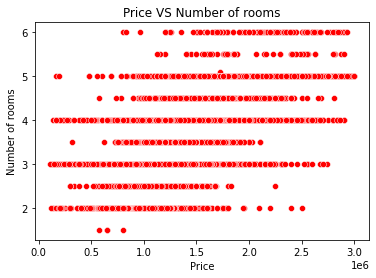

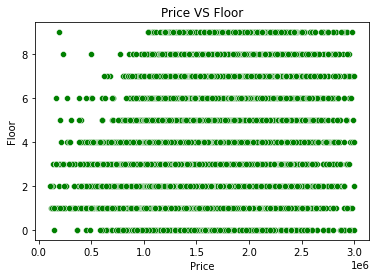

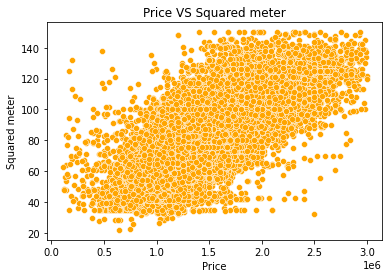

In [20]:
sb.scatterplot(x = df['Price'], y = df['Year sold'], color='blue')
plt.title("Price VS Year sold")
plt.show()

sb.scatterplot(x = df['Price'], y = df['Number of rooms'], color='red')
plt.title("Price VS Number of rooms")
plt.show()

sb.scatterplot(x = df['Price'], y = df['Floor'], color='green')
plt.title("Price VS Floor")
plt.show()

sb.scatterplot(x = df['Price'], y = df['Squared meter'], color='orange')
plt.title("Price VS Squared meter")
plt.show()

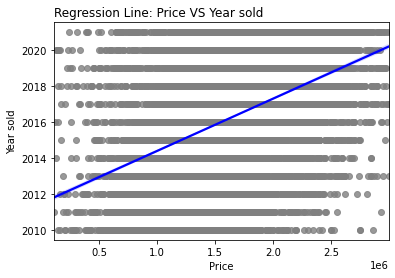

In [21]:
ax = sb.regplot(x="Price", y="Year sold", data=df, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Year sold", color="black", loc='left');

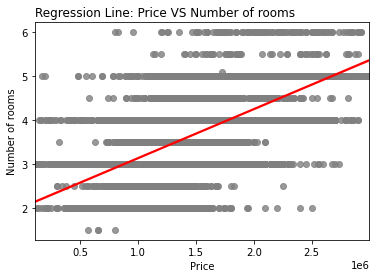

In [22]:
ax = sb.regplot(x="Price", y="Number of rooms", data=df, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "red"})
ax.set_title("Regression Line: Price VS Number of rooms", color="black", loc='left');

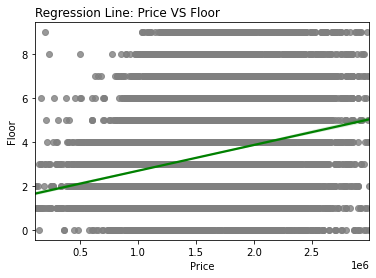

In [23]:
ax = sb.regplot(x="Price", y="Floor", data=df, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "green"})
ax.set_title("Regression Line: Price VS Floor", color="black", loc='left');

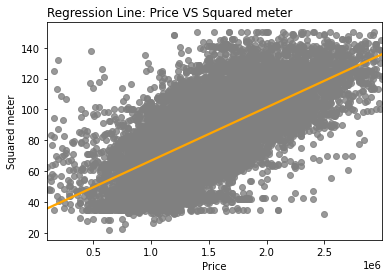

In [24]:
ax = sb.regplot(x="Price", y="Squared meter", data=df, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "orange"})
ax.set_title("Regression Line: Price VS Squared meter", color="black", loc='left');

In [25]:
df.describe()

,Year sold,Number of rooms,Floor,Squared meter,Price
count,17955.000000,17955.000000,17955.000000,17955.000000,1.795500e+04
mean,2015.820162,3.680401,3.268338,83.708588,1.490254e+06
std,3.323506,0.812672,2.077494,23.196421,4.434619e+05
min,2010.000000,1.500000,0.000000,22.000000,1.060000e+05
25%,2013.000000,3.000000,2.000000,65.745000,1.200000e+06
50%,2016.000000,4.000000,3.000000,81.700000,1.450000e+06
75%,2019.000000,4.000000,4.000000,99.000000,1.740000e+06
max,2021.000000,6.000000,9.000000,150.000000,2.999000e+06


We checked two options (and some more that we prefered not to show them).

one without streets at all, and one with get dummies function on the 'Street' column.

In [27]:
df_without_street = df.drop('Street', axis=1)
df_with_street_dummies = pd.get_dummies(df, columns = ['Street'], prefix = '', prefix_sep = '')

In [28]:
df.head()

,Year sold,Street,Kind,Number of rooms,Floor,Squared meter,Price
1,2021,קרל נטר,1,3.0,3.0,81.00,1770000
2,2021,יהודה הלוי,1,5.0,5.0,120.00,2400000
3,2021,שרירא שמואל,1,4.0,2.0,64.32,2050000
4,2021,"תרמ""ב",1,3.0,3.0,80.98,1640000
5,2021,"רש""י",1,4.0,2.0,86.44,1710000


In [29]:
df_without_street.head()

,Year sold,Kind,Number of rooms,Floor,Squared meter,Price
1,2021,1,3.0,3.0,81.00,1770000
2,2021,1,5.0,5.0,120.00,2400000
3,2021,1,4.0,2.0,64.32,2050000
4,2021,1,3.0,3.0,80.98,1640000
5,2021,1,4.0,2.0,86.44,1710000


In [30]:
df_with_street_dummies.head()

,Year sold,Kind,Number of rooms,Floor,Squared meter,Price,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
1,2021,1,3.0,3.0,81.00,1770000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,1,5.0,5.0,120.00,2400000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,1,4.0,2.0,64.32,2050000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2021,1,3.0,3.0,80.98,1640000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2021,1,4.0,2.0,86.44,1710000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Without streets

### Spliting the data into train and test parts

In [31]:
prices = df_without_street['Price']
data_without_prices = df_without_street.drop(['Price'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(data_without_prices, prices, test_size=0.2, random_state = 7)

In [32]:
X_train

,Year sold,Kind,Number of rooms,Floor,Squared meter
11063,2015,1,3.5,1.0,74.48
19340,2010,1,5.0,1.0,126.60
13451,2014,1,4.0,4.0,98.90
6886,2017,1,4.0,3.0,93.70
2731,2020,1,3.5,4.0,73.21
...,...,...,...,...,...
15014,2013,1,2.0,2.0,35.20
985,2021,1,4.0,1.0,80.90
6115,2018,2,3.0,0.0,50.20
11520,2015,2,2.5,0.0,56.00


In [33]:
y_train

11063    1240000
19340    2200000
13451    1250000
6886     1920000
2731     1280000
          ...   
15014     600000
985       785000
6115     1975000
11520    1060000
18299    1525000
Name: Price, Length: 14364, dtype: int64

### Normalization

In [34]:
basic_scale = MinMaxScaler()
X_train = basic_scale.fit_transform(X_train)
X_test = basic_scale.transform(X_test)

### Models

#### Dummy Regressor 

In [ ]:
# needs to be implemented

#### Models that we have learned

In [35]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
initial_prediction = linear_reg.predict(X_test)

print("score: ",linear_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,initial_prediction))
print ("MSE: ",mean_squared_error(y_test,initial_prediction, squared=False))

score:  0.6446039786084905
r^2 score:  0.6446039786084905
MSE:  261741.21421521684


In [36]:
# Cross validation
linear_reg_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10,scoring="neg_mean_squared_error")
linear_reg_scores_r2 = cross_val_score(LinearRegression(),X_train, y_train,cv=10,scoring="r2")

print("After cross validation\n")
print("R2 Score:",linear_reg_scores_r2.mean())
print ("MSE:",np.sqrt(-linear_reg_scores.mean()))

After cross validation

R2 Score: 0.6512125802413611
MSE: 262408.62802991486


In [ ]:
# KNN Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
initial_prediction = knn_reg.predict(X_test)

print("score: ",knn_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,initial_prediction))
print ("MSE: ",mean_squared_error(y_test,initial_prediction))

In [ ]:
# Cross validation
knn_reg_scores = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
knn_reg_scores_r2 = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train, y_train, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",knn_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-knn_reg_scores.mean()))

#### Models that we did not learn

In [37]:
# Random Forrest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
initial_prediction = rf_reg.predict(X_test)


print("score: ",rf_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,initial_prediction))
print ("MSE: ",mean_squared_error(y_test,initial_prediction))

score:  0.6165961893500083
r^2 score:  0.6165961893500083
MSE:  73907427992.69759


In [38]:
# Cross validation
rf_reg_scores = cross_val_score(RandomForestRegressor(),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
rf_reg_scores_r2 = cross_val_score(RandomForestRegressor(),X_train, y_train, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",rf_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-rf_reg_scores.mean()))

After cross validation

R2 Score: 0.6367041146161484
Mean Square ERR: 267908.65284136316


In [39]:
# outcome for knn
# need to be deleted

score:  0.6205994184257368
r^2 score:  0.6205994184257368
MSE:  73135739354.15459


In [40]:
# Cross validation outcome
# need to be deleted

After cross validation

R2 Score: 0.6438610779815563
Mean Square ERR: 265126.8458176779


In [103]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
initial_prediction = log_reg.predict(X_test)


print(log_reg.score(X_test, y_test))
print (mean_squared_error(y_test,initial_prediction))

0.024271844660194174
130380724172.41837


In [ ]:
# Cross validation
log_reg_scores = cross_val_score(LogisticRegression(),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
log_reg_scores_r2 = cross_val_score(LogisticRegression(),X_train, y_train, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",rf_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-rf_reg_scores.mean()))

## With street dummies

### Spliting the data into train and test parts

In [41]:
prices1 = df_with_street_dummies['Price']
data_without_prices1 = df_with_street_dummies.drop(['Price'],axis=1)
X_train1,X_test1,y_train1,y_test1 = train_test_split(data_without_prices1, prices1, test_size=0.2, random_state = 7)

In [42]:
X_train1

,Year sold,Kind,Number of rooms,Floor,Squared meter,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,אברבנאל,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
11063,2015,1,3.5,1.0,74.48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19340,2010,1,5.0,1.0,126.60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13451,2014,1,4.0,4.0,98.90,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6886,2017,1,4.0,3.0,93.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2731,2020,1,3.5,4.0,73.21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15014,2013,1,2.0,2.0,35.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
985,2021,1,4.0,1.0,80.90,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6115,2018,2,3.0,0.0,50.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11520,2015,2,2.5,0.0,56.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y_train1

11063    1240000
19340    2200000
13451    1250000
6886     1920000
2731     1280000
          ...   
15014     600000
985       785000
6115     1975000
11520    1060000
18299    1525000
Name: Price, Length: 14364, dtype: int64

### Normalization 

In [44]:
num_features = ['Year sold', 'Number of rooms', 'Floor', 'Squared meter']
basic_scale = MinMaxScaler()
X_train1[num_features] = basic_scale.fit_transform(X_train1[num_features])
X_test1[num_features] = basic_scale.transform(X_test1[num_features])

<ipython-input-44-afb92cad7756>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1[num_features] = basic_scale.fit_transform(X_train1[num_features])
C:\Users\matan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-44-afb92cad7756>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

### Models

#### Dummy Regressor

In [ ]:
# need to be implemented

#### Models that we have learned

In [45]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train1, y_train1)
initial_prediction = linear_reg.predict(X_test1)


print("score: ",linear_reg.score(X_test1,y_test1))
print("r^2 score: ",metrics.r2_score(y_test1,initial_prediction))
print ("MSE: ",mean_squared_error(y_test1,initial_prediction))

score:  -6.39736087192357e+21
r^2 score:  -6.39736087192357e+21
MSE:  1.2331971536313743e+33


In [46]:
# Cross validation
linear_reg_scores = cross_val_score(LinearRegression(), X_train1, y_train1, cv=10,scoring="neg_mean_squared_error")
linear_reg_scores_r2 = cross_val_score(LinearRegression(),X_train1, y_train1,cv=10,scoring="r2")

print("After cross validation\n")
print("R2 Score:",linear_reg_scores_r2.mean())
print ("MSE:",np.sqrt(-linear_reg_scores.mean()))

After cross validation

R2 Score: -6.690732167274571e+22
MSE: 1.148138458011564e+17


In [ ]:
# KNN Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train1, y_train1)
initial_prediction = knn_reg.predict(X_test1)


print("score: ",knn_reg.score(X_test1,y_test1))
print("r^2 score: ",metrics.r2_score(y_test1,initial_prediction))
print ("MSE: ",mean_squared_error(y_test1,initial_prediction))

In [ ]:
# Cross validation
knn_reg_scores = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train1, y_train1, cv=10, scoring="neg_mean_squared_error")
knn_reg_scores_r2 = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train1, y_train1, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",knn_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-knn_reg_scores.mean()))

#### Models that we did not learn

In [47]:
# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train1, y_train1)
initial_prediction = rf_reg.predict(X_test1)


print("score: ",rf_reg.score(X_test1,y_test1))
print("r^2 score: ",metrics.r2_score(y_test1,initial_prediction))
print ("MSE: ",mean_squared_error(y_test1,initial_prediction))

score:  0.7261759989234959
r^2 score:  0.7261759989234959
MSE:  52784106678.34739


In [48]:
# Cross validation
rf_reg_scores = cross_val_score(RandomForestRegressor(),X_train1, y_train1, cv=10, scoring="neg_mean_squared_error")
rf_reg_scores_r2 = cross_val_score(RandomForestRegressor(),X_train1, y_train1, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",rf_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-rf_reg_scores.mean()))

After cross validation

R2 Score: 0.730527738317776
Mean Square ERR: 231287.67498138893


In [49]:
# knn outcome
# need to be deleted

score:  0.7031273481119947
r^2 score:  0.7031273481119947
MSE:  57227115466.63235


In [50]:
# Cross validation outcome
# need to be deleted

After cross validation

R2 Score: 0.6765059744710886
Mean Square ERR: 252723.81902221034


In [100]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train1, y_train1)
initial_prediction = log_reg.predict(X_test1)


print(log_reg.score(X_test1, y_test1))
print (mean_squared_error(y_test1,initial_prediction))

0.028684907325684024
108412403139.76169


In [128]:
# Cross validation
log_reg_scores = cross_val_score(LogisticRegression(),X_train1, y_train1, cv=10, scoring="neg_mean_squared_error")
log_reg_scores_r2 = cross_val_score(LogisticRegression(),X_train1, y_train1, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",log_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-log_reg_scores.mean()))

After cross validation

score:  -110015270079.27939
R2 Score: 0.6628512643143023
Mean Square ERR: 268606.864171569


## Tuning

For improvment, we will use GridSearchCV on our best model.

In [ ]:
parameters = {np.arrange(0.1,0.2,0.01), [500,1000,30000]}
grid = GridSearchCV(estimator = RandomForestRegressor(), param_grid = parameters)
grid.fit(X_train1, y_train1)

In [ ]:
# The best parameters
best_parameters = grid.best_params_
best_parameters

In [ ]:
# The best score
best_score = grid.best_score_
best_score

# Conclusion

The best model (between the models that we chceked) for our dataset is:

**Random Forest Reggresor** with the hyper_parameters: ...

His score is: ...